# Multilayer Perceptrons to Classify Handwritten Digits

Create a multilayer neural network to correctly classify handwritten digits using the MNIST database.

The MNIST database of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')

%matplotlib inline

## Load the Image Data

In [4]:
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

In [8]:
# Download data from BlackBoard - file is mnist-original.mat 
# This is where you need to put the data
from sklearn.datasets import get_data_home
print(get_data_home())

C:\Users\Dominic\scikit_learn_data


In [9]:
mnist = fetch_mldata("MNIST original")

In [10]:
# Look at a single digit 
mnist['data'][0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [11]:
# rescale the data, use the traditional train/test split
X, y = mnist.data / 255., mnist.target

In [12]:
# This function shows a digit
def showDigit(X,y,index):
    plt.imshow(X[index].reshape(28,28),cmap='Greys')
    print('Label:',y[index])

In [13]:
X.shape 

(70000, 784)

In [14]:
y.shape

(70000,)

Label: 0.0


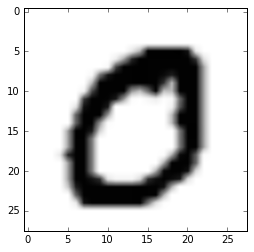

In [15]:
showDigit(X,y,4)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0/7.0, random_state=42)

In [17]:
mlp = MLPClassifier(hidden_layer_sizes=(20,20), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [18]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.38526103
Iteration 2, loss = 0.19114655
Iteration 3, loss = 0.15774070
Iteration 4, loss = 0.14343989
Iteration 5, loss = 0.13478558
Iteration 6, loss = 0.12733524
Iteration 7, loss = 0.12067135
Iteration 8, loss = 0.11517211
Iteration 9, loss = 0.11322545
Iteration 10, loss = 0.11063648
Iteration 11, loss = 0.10705095
Iteration 12, loss = 0.10664845
Iteration 13, loss = 0.10084600
Iteration 14, loss = 0.10004204
Iteration 15, loss = 0.09834190
Iteration 16, loss = 0.09631826
Iteration 17, loss = 0.09640325
Iteration 18, loss = 0.09328064
Iteration 19, loss = 0.09514351
Iteration 20, loss = 0.09195252
Iteration 21, loss = 0.09209215
Iteration 22, loss = 0.09060191
Iteration 23, loss = 0.09174923
Iteration 24, loss = 0.08604622
Iteration 25, loss = 0.08832258
Iteration 26, loss = 0.08491587
Iteration 27, loss = 0.08621414
Iteration 28, loss = 0.08435047
Iteration 29, loss = 0.08382644
Iteration 30, loss = 0.07956910
Iteration 31, loss = 0.08082455
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.1, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [19]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.976133
Test set score: 0.955100


In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
y_pred = mlp.predict(X_test)

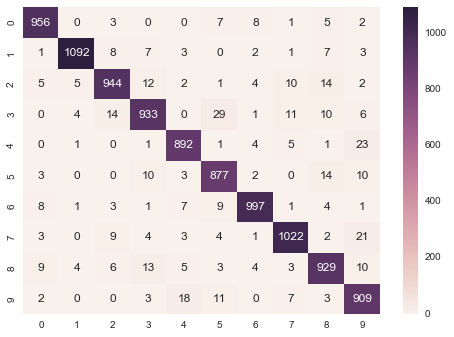

In [22]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [23]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=400, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [24]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.28719392
Iteration 2, loss = 0.10954555
Iteration 3, loss = 0.07720196
Iteration 4, loss = 0.06036469
Iteration 5, loss = 0.04859421
Iteration 6, loss = 0.03889050
Iteration 7, loss = 0.03283819
Iteration 8, loss = 0.02594181
Iteration 9, loss = 0.02219792
Iteration 10, loss = 0.01985162
Iteration 11, loss = 0.01480834
Iteration 12, loss = 0.01478317
Iteration 13, loss = 0.01589940
Iteration 14, loss = 0.00881240
Iteration 15, loss = 0.00893957
Iteration 16, loss = 0.00978984
Iteration 17, loss = 0.00592006
Iteration 18, loss = 0.00276869
Iteration 19, loss = 0.00195642
Iteration 20, loss = 0.00072926
Iteration 21, loss = 0.00052323
Iteration 22, loss = 0.00047467
Iteration 23, loss = 0.00044858
Iteration 24, loss = 0.00043291
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.1, max_iter=400, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [25]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 1.000000
Test set score: 0.980900


In [26]:
y_pred = mlp.predict(X_test)

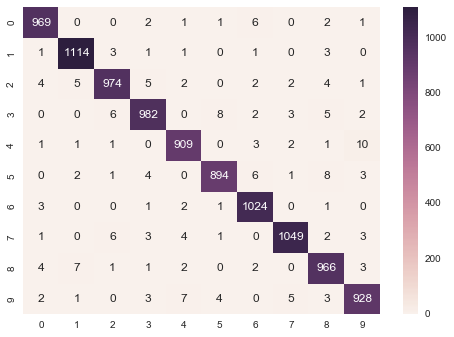

In [27]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")

In [28]:
y_pred

array([7., 8., 6., ..., 9., 1., 6.])

In [29]:
y_test

array([7., 8., 6., ..., 9., 1., 6.])

In [30]:
for i in range(0,200):
    if y_pred[i] != y_test[i]:
        print("Index:",i)

Index: 13
Index: 46
Index: 53
Index: 188


Label: 2.0
Predicted: 9.0


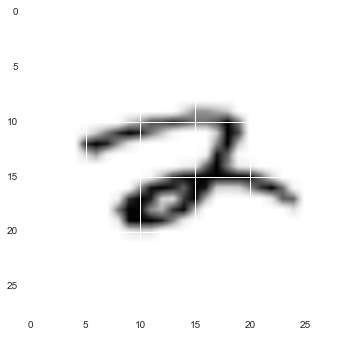

In [31]:
i = 13
showDigit(X_test,y_test,i)
print("Predicted:",y_pred[i])

Label: 5.0
Predicted: 9.0


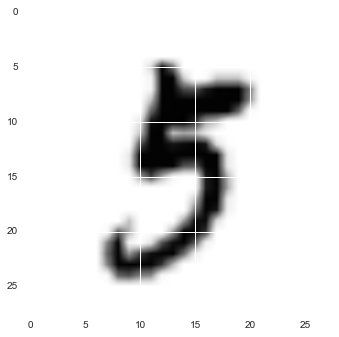

In [33]:
i = 46
showDigit(X_test,y_test,i)
print("Predicted:",y_pred[i])